# Medical Imaging & Big Data

## 1. Introduction
[testo]

## 2. Dataset Preprocessing

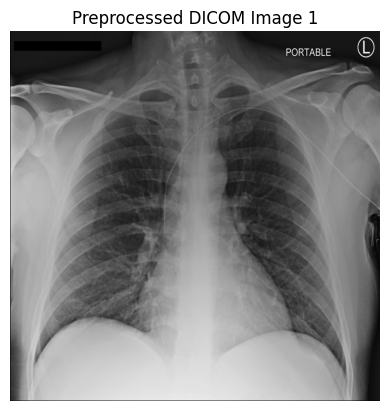

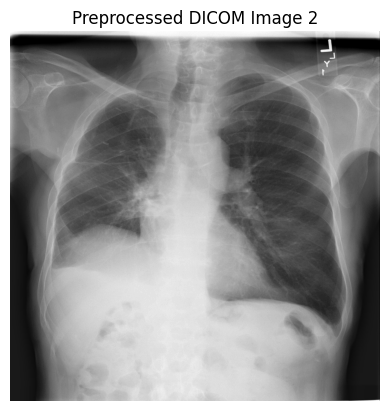

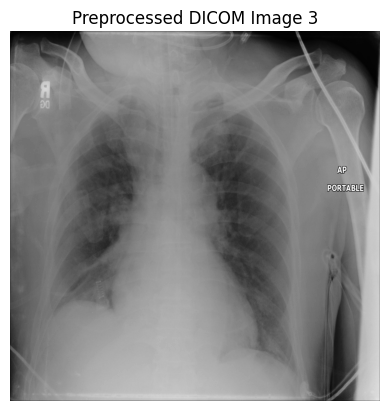

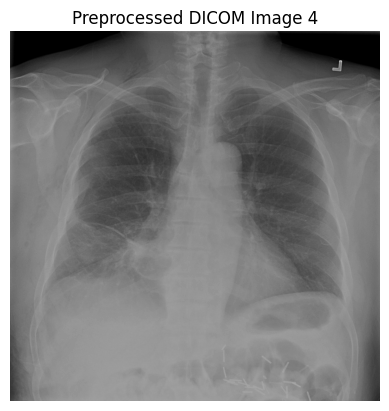

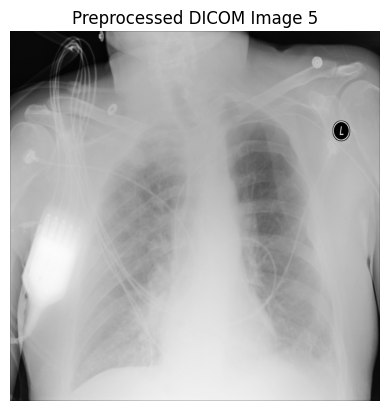

In [1]:
# Import necessary libraries
#!pip install pydicom numpy matplotlib pandas gdcm
#!conda install -c conda-forge gdcm -y



import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to preprocess DICOM images
def preprocess_dicom_image(file_path):
    """
    This function reads a DICOM file, extracts the image data, and normalizes the pixel values.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    np.array: Preprocessed image data
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # Extract image data as a numpy array
    image_data = dicom_file.pixel_array
    
    # Normalize the pixel values to the range 0-1
    image_data = image_data / np.max(image_data)
    
    return image_data

# Directory containing DICOM files
dicom_dir = "dicom_files"

# List all DICOM files in the directory
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith('.dcm')]

# Preprocess and display the first 5 DICOM images
for i, dicom_file in enumerate(dicom_files[:5]):
    # Preprocess the DICOM image
    preprocessed_image = preprocess_dicom_image(dicom_file)
    
    # Display the preprocessed image
    plt.figure()
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title(f'Preprocessed DICOM Image {i+1}')
    plt.axis('off')
    plt.show()

## 3. Metadata Extraction and Exploration


In [2]:
# Function to extract patient gender from DICOM metadata
def extract_patient_gender(file_path):
    """
    This function reads a DICOM file and extracts the patient's gender from the metadata.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    str: Patient's gender (if available)
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # Extract patient gender from metadata (if available)
    if 'PatientSex' in dicom_file:
        return dicom_file.PatientSex
    else:
        return "Unknown"

# List to store patient genders
patient_genders = []

# Extract patient gender from each DICOM file
for dicom_file in dicom_files:
    gender = extract_patient_gender(dicom_file)
    patient_genders.append(gender)

# Display the extracted patient genders
for i, gender in enumerate(patient_genders[:5]):
    print(f'Patient Gender for Image {i+1}: {gender}')


Patient Gender for Image 1: M
Patient Gender for Image 2: M
Patient Gender for Image 3: M
Patient Gender for Image 4: M
Patient Gender for Image 5: M


In [3]:
import pandas as pd

# List to store patient metadata
patient_metadata = []

# Extract metadata from each DICOM file
for dicom_file in dicom_files:
    dicom_data = pydicom.dcmread(dicom_file)
    metadata = {
        "File": dicom_file,
        "PatientID": dicom_data.PatientID if 'PatientID' in dicom_data else "Unknown",
        "PatientSex": dicom_data.PatientSex if 'PatientSex' in dicom_data else "Unknown",
        "PatientAge": dicom_data.PatientAge if 'PatientAge' in dicom_data else "Unknown",
    }
    patient_metadata.append(metadata)

# Convert to pandas DataFrame
metadata_df = pd.DataFrame(patient_metadata)

# Display the first 5 rows of the DataFrame
metadata_df.head(20)


,File,PatientID,PatientSex,PatientAge
0,dicom_files/1.2.276.0.7230010.3.1.4.8323329.13...,2895af6e-fdf8-482e-8eca-832d93b8256b,M,38
1,dicom_files/1.2.276.0.7230010.3.1.4.8323329.12...,b143580c-6be9-4dc5-8db6-c18677e29829,M,74
2,dicom_files/1.2.276.0.7230010.3.1.4.8323329.35...,0d0dfee1-9157-4206-99f5-1ee71a547d81,M,66
3,dicom_files/1.2.276.0.7230010.3.1.4.8323329.21...,a43177b0-f9a5-44ee-a040-ff3626db4337,M,62
4,dicom_files/1.2.276.0.7230010.3.1.4.8323329.25...,f2c467a9-9168-43b3-a561-e6bb123773df,M,45
5,dicom_files/1.2.276.0.7230010.3.1.4.8323329.46...,2fb5d96f-c0f2-46c9-bc36-cf809cf6e297,M,60
6,dicom_files/1.2.276.0.7230010.3.1.4.8323329.24...,8463ab5b-6085-43c9-ba9d-1a2e812f141b,M,64
7,dicom_files/1.2.276.0.7230010.3.1.4.8323329.36...,0895cb60-1ae0-43a9-b365-f6d272a45db3,M,64
8,dicom_files/1.2.276.0.7230010.3.1.4.8323329.31...,d6d382fe-dcd2-4c7a-b591-677cc4d014c8,F,75
9,dicom_files/1.2.276.0.7230010.3.1.4.8323329.11...,6eef6e7d-d808-417d-8f8e-0e09be2adcf9,F,47


In [4]:
# Function to list all metadata fields in a DICOM file
def list_dicom_metadata(file_path):
    """
    This function reads a DICOM file and lists all metadata fields.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    list: List of all metadata fields
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # List all metadata fields
    metadata_fields = dicom_file.dir()
    
    return metadata_fields

# Choose one DICOM file to explore
dicom_file_to_explore = dicom_files[0]

# Get all metadata fields
metadata_fields = list_dicom_metadata(dicom_file_to_explore)

# Display the total number of metadata fields and list them
print(f'Total metadata fields: {len(metadata_fields)}')
print('Metadata fields:')
for field in metadata_fields:
    print(field)


Total metadata fields: 35
Metadata fields:
AccessionNumber
BitsAllocated
BitsStored
BodyPartExamined
Columns
ConversionType
HighBit
InstanceNumber
LossyImageCompression
LossyImageCompressionMethod
Modality
PatientAge
PatientBirthDate
PatientID
PatientName
PatientOrientation
PatientSex
PhotometricInterpretation
PixelData
PixelRepresentation
PixelSpacing
ReferringPhysicianName
Rows
SOPClassUID
SOPInstanceUID
SamplesPerPixel
SeriesDescription
SeriesInstanceUID
SeriesNumber
SpecificCharacterSet
StudyDate
StudyID
StudyInstanceUID
StudyTime
ViewPosition


In [5]:
# Set to store unique metadata fields
unique_metadata_fields = set()

# Extract metadata fields from each DICOM file
for dicom_file in dicom_files:
    metadata_fields = list_dicom_metadata(dicom_file)
    unique_metadata_fields.update(metadata_fields)

# Display the total number of unique metadata fields and list them
print(f'Total unique metadata fields across all files: {len(unique_metadata_fields)}')
print('Unique metadata fields:')
for field in unique_metadata_fields:
    print(field)


Total unique metadata fields across all files: 35
Unique metadata fields:
ReferringPhysicianName
BitsStored
PatientSex
PhotometricInterpretation
SOPInstanceUID
PixelData
PatientID
AccessionNumber
PixelRepresentation
StudyTime
StudyID
Rows
Columns
SeriesInstanceUID
SeriesNumber
SeriesDescription
SpecificCharacterSet
ViewPosition
StudyInstanceUID
BodyPartExamined
SOPClassUID
LossyImageCompression
ConversionType
LossyImageCompressionMethod
PatientName
PixelSpacing
PatientOrientation
BitsAllocated
HighBit
StudyDate
PatientAge
SamplesPerPixel
Modality
PatientBirthDate
InstanceNumber


In [6]:
list_dicom_metadata(dicom_files[0])

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

In [7]:
# Function to extract and display potential diagnostic metadata fields
def extract_diagnostic_info(file_path):
    """
    This function reads a DICOM file and extracts potential diagnostic information from metadata.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    dict: Dictionary containing potential diagnostic metadata fields and their values
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # List of potential diagnostic metadata fields
    potential_diagnostic_fields = [
        'StudyDescription', 'SeriesDescription', 'ProtocolName', 'ClinicalTrialProtocolID',
        'ClinicalTrialProtocolName', 'ClinicalTrialSiteID', 'ClinicalTrialSiteName'
    ]
    
    # Extract the values of potential diagnostic fields
    diagnostic_info = {}
    for field in potential_diagnostic_fields:
        if hasattr(dicom_file, field):
            diagnostic_info[field] = getattr(dicom_file, field)
        else:
            diagnostic_info[field] = 'Not Available'
    
    return diagnostic_info

# Choose one DICOM file to explore
dicom_file_to_explore = dicom_files[31]

# Extract and display potential diagnostic information
diagnostic_info = extract_diagnostic_info(dicom_file_to_explore)
print('Potential Diagnostic Information:')
for field, value in diagnostic_info.items():
    print(f'{field}: {value}')


Potential Diagnostic Information:
StudyDescription: Not Available
SeriesDescription: view: AP
ProtocolName: Not Available
ClinicalTrialProtocolID: Not Available
ClinicalTrialProtocolName: Not Available
ClinicalTrialSiteID: Not Available
ClinicalTrialSiteName: Not Available


MATTEO

In [8]:
patient_metadata = []

# List of metadata fields to extract
metadata_fields = [
    #"AccessionNumber",
    #"BitsAllocated",
    #"BitsStored",
    #"BodyPartExamined",
    #"Columns",
    #"ConversionType",
    #"HighBit",
    #"InstanceNumber",
    #"LossyImageCompression",
    #"LossyImageCompressionMethod",
    #"Modality",
    "PatientAge",
    #"PatientBirthDate",
    "PatientID",
    #"PatientName",
    #"PatientOrientation",
    "PatientSex",
    #"PhotometricInterpretation",
    #"PixelData",
    #"PixelRepresentation",
    "PixelSpacing",
    #"ReferringPhysicianName",
    #"Rows",
    #"SOPClassUID",
    "SOPInstanceUID",
    #"SamplesPerPixel",
    #"SeriesDescription",
    "SeriesInstanceUID",
    #"SeriesNumber",
    #"SpecificCharacterSet",
    #"StudyDate",
    #"StudyID",
    "StudyInstanceUID",
    #"StudyTime",
    
    "ViewPosition",
]

# Extract metadata from each DICOM file
for dicom_file in dicom_files:
    dicom_data = pydicom.dcmread(dicom_file)
    metadata = {"File": dicom_file}
    for field in metadata_fields:
        metadata[field] = getattr(dicom_data, field, "Unknown")
    patient_metadata.append(metadata)

# Convert to pandas DataFrame
metadata_df = pd.DataFrame(patient_metadata)

# Display the first 20 rows of the DataFrame
print(metadata_df.head(20))

# Save the DataFrame as a CSV file
metadata_df.to_csv("dicom_metadata.csv", index=False)

                                                 File PatientAge  \
0   dicom_files/1.2.276.0.7230010.3.1.4.8323329.13...         38   
1   dicom_files/1.2.276.0.7230010.3.1.4.8323329.12...         74   
2   dicom_files/1.2.276.0.7230010.3.1.4.8323329.35...         66   
3   dicom_files/1.2.276.0.7230010.3.1.4.8323329.21...         62   
4   dicom_files/1.2.276.0.7230010.3.1.4.8323329.25...         45   
5   dicom_files/1.2.276.0.7230010.3.1.4.8323329.46...         60   
6   dicom_files/1.2.276.0.7230010.3.1.4.8323329.24...         64   
7   dicom_files/1.2.276.0.7230010.3.1.4.8323329.36...         64   
8   dicom_files/1.2.276.0.7230010.3.1.4.8323329.31...         75   
9   dicom_files/1.2.276.0.7230010.3.1.4.8323329.11...         47   
10  dicom_files/1.2.276.0.7230010.3.1.4.8323329.14...         47   
11  dicom_files/1.2.276.0.7230010.3.1.4.8323329.11...         21   
12  dicom_files/1.2.276.0.7230010.3.1.4.8323329.10...         62   
13  dicom_files/1.2.276.0.7230010.3.1.4.8323329.

In [9]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Display the first row of the DataFrame
print(metadata_df.iloc[0])


File                 dicom_files/1.2.276.0.7230010.3.1.4.8323329.13274.1517875244.451447.dcm
PatientAge                                                                                38
PatientID                                               2895af6e-fdf8-482e-8eca-832d93b8256b
PatientSex                                                                                 M
PixelSpacing                                                                  [0.139, 0.139]
SOPInstanceUID                       1.2.276.0.7230010.3.1.4.8323329.13274.1517875244.451447
SeriesInstanceUID                    1.2.276.0.7230010.3.1.3.8323329.13274.1517875244.451445
StudyInstanceUID                     1.2.276.0.7230010.3.1.2.8323329.13274.1517875244.451446
ViewPosition                                                                              AP
Name: 0, dtype: object


: 

CNN SEX CLASSIFICATION

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
#!pip install tensorflow
import os
import pydicom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

2024-07-03 16:27:09.956101: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Function to preprocess DICOM images
def preprocess_dicom_image(file_path):
    dicom_file = pydicom.dcmread(file_path)
    image_data = dicom_file.pixel_array
    image_data = image_data / np.max(image_data)  # Normalize pixel values to 0-1
    image_data = np.stack((image_data,) * 3, axis=-1)  # Convert to 3-channel image
    image_data = np.resize(image_data, (128, 128, 3))  # Resize to 128x128
    return image_data


# Directory containing DICOM files
dicom_dir = "dicom_files"

# List all DICOM files in the directory
dicom_files = [
    os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith(".dcm")
]

# List to store patient metadata and images
data = []
labels = []


# Extract metadata and images
for i in range(0, 1500):  # len(dicom_files)):

    dicom_data = pydicom.dcmread(dicom_files[i])
    if "PatientSex" in dicom_data:
        print("Image n.", i)

        image = preprocess_dicom_image(dicom_files[i])
        sex = 1 if dicom_data.PatientSex == "M" else 0
        data.append(image)
        labels.append(sex)

Image n. 0
Image n. 1
Image n. 2
Image n. 3
Image n. 4
Image n. 5
Image n. 6
Image n. 7
Image n. 8
Image n. 9
Image n. 10
Image n. 11
Image n. 12
Image n. 13
Image n. 14
Image n. 15
Image n. 16
Image n. 17
Image n. 18
Image n. 19
Image n. 20
Image n. 21
Image n. 22
Image n. 23
Image n. 24
Image n. 25
Image n. 26
Image n. 27
Image n. 28
Image n. 29
Image n. 30
Image n. 31
Image n. 32
Image n. 33
Image n. 34
Image n. 35
Image n. 36
Image n. 37
Image n. 38
Image n. 39
Image n. 40
Image n. 41
Image n. 42
Image n. 43
Image n. 44
Image n. 45
Image n. 46
Image n. 47
Image n. 48
Image n. 49
Image n. 50
Image n. 51
Image n. 52
Image n. 53
Image n. 54
Image n. 55
Image n. 56
Image n. 57
Image n. 58
Image n. 59
Image n. 60
Image n. 61
Image n. 62
Image n. 63
Image n. 64
Image n. 65
Image n. 66
Image n. 67
Image n. 68
Image n. 69
Image n. 70
Image n. 71
Image n. 72
Image n. 73
Image n. 74
Image n. 75
Image n. 76
Image n. 77
Image n. 78
Image n. 79
Image n. 80
Image n. 81
Image n. 82
Image n. 83
Im

In [3]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)


# One-hot encode the labels
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [4]:
## CPU MODEL 
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Build the CNN model
# model = Sequential()

# # Add convolutional layers
# model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(MaxPooling2D((2, 2)))

# # Flatten the output
# model.add(Flatten())

# # Add dense layers
# model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation="softmax"))

# # Compile the model
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


## MODEL USING GPU AMD Radeon Pro
import os

os.environ["PLAIDML_VERBOSE"] = "1"
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20
30/30 [==============================] - 12s 348ms/step - loss: 0.7857 - accuracy: 0.5354 - val_loss: 0.6876 - val_accuracy: 0.5375
Epoch 2/20
30/30 [==============================] - 10s 339ms/step - loss: 0.6804 - accuracy: 0.5656 - val_loss: 0.7106 - val_accuracy: 0.5375
Epoch 3/20
30/30 [==============================] - 10s 325ms/step - loss: 0.6780 - accuracy: 0.5604 - val_loss: 0.7158 - val_accuracy: 0.5333
Epoch 4/20
30/30 [==============================] - 10s 334ms/step - loss: 0.6708 - accuracy: 0.5823 - val_loss: 0.6647 - val_accuracy: 0.6125
Epoch 5/20
30/30 [==============================] - 9s 299ms/step - loss: 0.6667 - accuracy: 0.5760 - val_loss: 0.6759 - val_accuracy: 0.5750
Epoch 6/20
30/30 [==============================] - 9s 293ms/step - loss: 0.6656 - accuracy: 0.6073 - val_loss: 0.7507 - val_accuracy: 0.5792
Epoch 7/20
30/30 [==============================] - 9s 311ms/step - loss: 0.6670 - accuracy: 0.6062 - val_loss: 0.6686 - val_accuracy: 0.6042
Ep

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Save the model
model.save("models/patient_sex_predictor.h5")

10/10 [==============================] - 1s 60ms/step - loss: 0.7476 - accuracy: 0.5767
Test accuracy: 0.5767


/Users/matteomondini/anaconda3/envs/amd_gpu/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
